<a href="https://colab.research.google.com/github/abosedealli/Stockprediction/blob/main/AR%20(TSA)%20short%20term-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Time Series AR Model

In [2]:
!pip install pmdarima
!pip  install pandas
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [4]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.model_selection import train_test_split

In [6]:
stock_data = pd.read_csv("/content/neflix.csv")

In [66]:
a_df = stock_data['Adj Close']
a_df = pd.DataFrame(a_df)

In [67]:
a_df

,Adj Close
0,329.809998
1,325.899994
2,335.829987
3,330.750000
4,339.260010
...,...
751,294.959991
752,284.170013
753,276.880005
754,291.119995


In [36]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller

In [68]:
df_stationarityTest = adfuller(a_df['Adj Close'], autolag='AIC')

In [69]:
train_df = a_df.sample(frac=0.8, random_state=25)
test_df = a_df.drop(train_df.index)

In [70]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_df, lags=52)  # use time span of 1 year for lagging
trained_model = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [71]:
trained_model = AutoReg(train_df, 52).fit(cov_type="HC0")

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [72]:
print("P-value: ", df_stationarityTest[1])

P-value:  0.6647851095654084


In [74]:
ar_model = AutoReg(train_df, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:              Adj Close   No. Observations:                  605
Model:                     AutoReg(8)   Log Likelihood               -3771.333
Method:               Conditional MLE   S.D. of innovations            134.049
Date:                Sun, 22 Jan 2023   AIC                           7562.666
Time:                        03:59:24   BIC                           7606.585
Sample:                             8   HQIC                          7579.767
                                  605                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          396.3221     46.035      8.609      0.000     306.094     486.550
Adj Close.L1     0.0612      0.041      1.498      0.134      -0.019       0.141
Adj Close.L2     0.0590      0.041      1.44

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


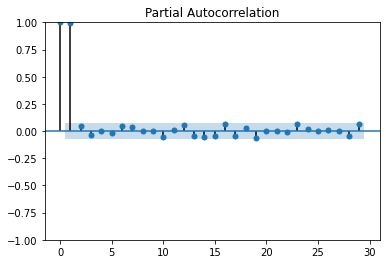

In [117]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(a_df)


In [128]:
# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = ar_model.predict(start=start, end=end+100, dynamic=True)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [149]:
#  RMSE and MAPE  we will Calculate the RMSE and MAPE values
rmse = np.sqrt(np.mean((prediction - test_df['Adj Close'])**2))
mse=(np.mean((prediction - test_df['Adj Close'])**2))
mape = np.mean(np.abs(prediction - test_df['Adj Close']) / test_df['Adj Close'])
mae= np.mean(np.abs(prediction - test_df['Adj Close']))

print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)
print("MAE:", mae)


RMSE: 194.25963744145622
MAPE: 0.8461373687708655
MSE: 37736.806738886015
MAE: 190.1518052363335


# New Section
Calculating High Prices

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


P-value:  (-1.1934752453237192, 0.6763961797885724, 1, 754, {'1%': -3.439052522969989, '5%': -2.8653808299915013, '10%': -2.5688152592363274}, 5676.276566209488)


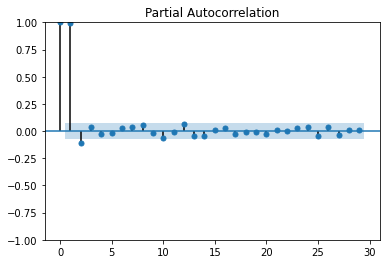

In [85]:
!pip install pmdarima
!pip  install pandas
from pmdarima.arima import auto_arima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.model_selection import train_test_split
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller

stock_data = pd.read_csv("/content/neflix.csv")
h_df = stock_data['High']
h_df = pd.DataFrame(h_df)
h_df

df_stationarityTesting = adfuller(h_df['High'], autolag='AIC')
train_f = h_df.sample(frac=0.8, random_state=25)
test_f = h_df.drop(train_f.index)

model = AutoReg(train_f, lags=52)  
training_model = model.fit()

training_model = AutoReg(train_f, 52).fit(cov_type="HC0")
print("P-value: ", df_stationarityTesting)
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(h_df)



In [64]:
h_df

,High
0,329.980011
1,329.859985
2,336.359985
3,336.700012
4,342.700012
...,...
751,298.459991
752,293.570007
753,285.190002
754,295.500000


In [65]:
arima_model = AutoReg(train_f, lags=8).fit()
print(arima_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   High   No. Observations:                  605
Model:                     AutoReg(8)   Log Likelihood               -3775.696
Method:               Conditional MLE   S.D. of innovations            135.032
Date:                Sun, 22 Jan 2023   AIC                           7571.392
Time:                        03:52:02   BIC                           7615.311
Sample:                             8   HQIC                          7588.493
                                  605                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        400.8679     46.750      8.575      0.000     309.240     492.496
High.L1        0.0592      0.041      1.447      0.148      -0.021       0.139
High.L2        0.0598      0.041      1.461      0.1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [126]:
test_f

,High
8,345.380005
14,349.880005
15,359.850006
20,347.390015
22,369.570007
...,...
744,324.709991
745,303.390015
749,300.660004
753,285.190002


In [146]:
start = len(train_f)
end = len(train_f) + len(test_f) - 1
model_prediction = arima_model.predict(start=start, end=end+100, dynamic=True)

# Plot testing data with prediction


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [87]:
rmse = np.sqrt(np.mean((model_prediction - test_f['High'])**2))
mse=(np.mean((model_prediction - test_f['High'])**2))
mape = np.mean(np.abs(model_prediction - test_f['High']) / test_f['High'])
mae= np.mean(np.abs(model_prediction - test_f['High']))

print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)
print("MAE:", mae)

RMSE: 193.1091743141794
MAPE: 0.8193691268210151
MSE: 37291.15320430413
MAE: 188.4285962974917


# New Section
Price for Average

In [88]:

stock_data = pd.read_csv("/content/neflix.csv")

In [94]:
av_dfstock = pd.DataFrame(av_df)
av_dfstock

df_stationarityTestav = adfuller(av_dfstock['average'], autolag='AIC')
train_avf = av_dfstock.sample(frac=0.8, random_state=25)
test_avf = av_dfstock.drop(train_avf.index)

In [89]:
av_df= stock_data.assign(**{'average': lambda df: df.loc[:,['Open','High','Adj Close','Low','Close']].mean(axis=1), 
                    'EMA20': lambda df: df['average'].ewm(span=20, adjust=False).mean(), 
                    'dist_EMA20': lambda df: (df['average'] - df['EMA20'])/df['EMA20']*100})
av_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,average,EMA20,dist_EMA20
0,2/01/2020,326.100006,329.980011,324.779999,329.809998,329.809998,4485800,328.096002,328.096002,0.000000
1,3/01/2020,326.779999,329.859985,325.529999,325.899994,325.899994,3806900,326.793994,327.972002,-0.359179
2,6/01/2020,323.119995,336.359985,321.200012,335.829987,335.829987,5663100,330.467993,328.209715,0.688059
3,7/01/2020,336.470001,336.700012,330.299988,330.750000,330.750000,4703200,332.994000,328.665361,1.317035
4,8/01/2020,331.489990,342.700012,331.049988,339.260010,339.260010,7104500,336.752002,329.435518,2.220915


In [109]:
av_dfstock = av_df['average']

In [111]:
train_avf = av_dfstock.sample(frac=0.8, random_state=25)
test_avf = av_dfstock.drop(train_avf.index)

In [110]:
av_dfstock

0      328.096002
1      326.793994
2      330.467993
3      332.994000
4      336.752002
          ...    
751    295.293994
752    287.446008
753    278.856006
754    288.385999
755    290.704004
Name: average, Length: 756, dtype: float64

In [112]:
model = AutoReg(train_avf, lags=52) 
train_model = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


P-value:  (-1.2116009358910764, 0.6685854789626283, 1, 754, {'1%': -3.439052522969989, '5%': -2.8653808299915013, '10%': -2.5688152592363274}, 5543.331090943282)


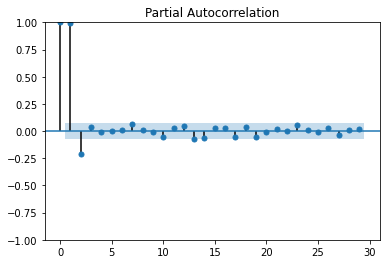

In [115]:
train_model = AutoReg(train_avf, 52).fit(cov_type="HC0")
print("P-value: ", df_stationarityTestav)
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(av_dfstock)

In [121]:
parima_model = AutoReg(train_avf, lags=8).fit()
print(parima_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                average   No. Observations:                  605
Model:                     AutoReg(8)   Log Likelihood               -3771.781
Method:               Conditional MLE   S.D. of innovations            134.149
Date:                Sun, 22 Jan 2023   AIC                           7563.563
Time:                        06:07:20   BIC                           7607.482
Sample:                             8   HQIC                          7580.664
                                  605                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        395.0968     46.044      8.581      0.000     304.852     485.341
average.L1     0.0600      0.041      1.468      0.142      -0.020       0.140
average.L2     0.0601      0.041      1.470      0.1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [138]:
test_avf

8      340.535998
14     340.026007
15     352.102002
20     345.188007
22     364.938007
          ...    
744    318.751996
745    294.576001
749    294.613995
753    278.856006
754    288.385999
Name: average, Length: 151, dtype: float64

In [142]:
start = len(train_avf)
end = len(train_avf) + len(test_avf) - 1

m_prediction = parima_model.predict(start=start, end=end+100, dynamic=True)
#plt.plot(test_avf, 'orange', label='Actual Price')
#plt.plot(m_prediction, 'green', label='Predicted Price')
#plt.title('Price Prediction')
#plt.ylabel("Prices")
#plt.legend()
#plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [145]:
rmse = np.sqrt(np.mean((m_prediction - test_avf)**2))
mse=(np.mean((m_prediction - test_avf)**2))
mape = np.mean(np.abs(m_prediction - test_avf) / test_avf)
mae= np.mean(np.abs(model_prediction - test_avf))

print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)
print("MAE:", mae)

RMSE: 194.527879905021
MAPE: 0.8493904059807785
MSE: 37841.09606034227
MAE: 197.26596936406156
